In [2]:
# matplotlib.pyplot: 用來繪製影像
# sklearn.datasets: 用來繪入內建之手寫數字資料庫
# sklearn.svm: SVM 支持向量機之演算法物件
# sklearn.metrics: 用來評估辨識準確度以及報表的顯示

import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

digits = datasets.load_digits()

In [3]:
# 使用datasets.load_digits()將資料存入，digits為一個dict型別資料，我們可以用以下指令來看一下資料的內容。
for key, value in digits.items():
    try:
        print(key,value.shape)
    except:
        print(key)

data (1797, 64)
target (1797,)
frame
feature_names
target_names (10,)
images (1797, 8, 8)
DESCR


ValueError: num must be 1 <= num <= 10, not 11

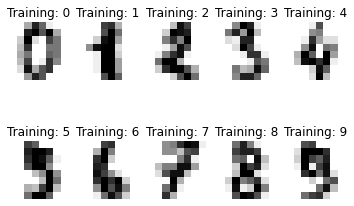

In [4]:
images_and_labels = list(zip(digits.images,digits.target))

for index,(image,label) in enumerate(images_and_labels):
    plt.subplot(2,5,index+1)
    plt.axis("off")
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Training: %i" %label)

In [5]:
n_samples = len(digits.images)
# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
data = digits.images.reshape((n_samples,-1))

# 產生SVC分類器
classifier = svm.SVC(gamma=0.001)

# 用前半部份的資料來訓練
classifier.fit(data[:n_samples//2],digits.target[:n_samples//2])

expected = digits.target[n_samples//2:]

#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples//2:])


In [6]:
# 那在判斷準確度方面，我們可以使用一個名為「混淆矩陣」(Confusion matrix)的方式來統計。
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))
# 使用sklearn中之metrics物件，metrics.confusion_matrix(真實資料:899, 預測資料:899)可以列出下面矩陣。此矩陣對角線左上方第一個數字 87，代表實際為0且預測為0的總數有87個，同一列(row)第五個元素則代表，實際為0但判斷為4的資料個數為1個
# 我們可以利用以下的程式碼將混淆矩陣圖示出來。由圖示可以看出，實際為3時，有數次誤判為5,7,8。

# True Positive(TP,真陽):實際為3且判斷為3，共79個
# False Positive(FP,偽陽):判斷為3但判斷錯誤，共2個
# False Negative(FN,偽陰):實際為3但判斷錯誤，共12個
# True Negative(TN,真陰):實際不為3，且判斷正確。也就是其餘899-79-2-12=885個

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


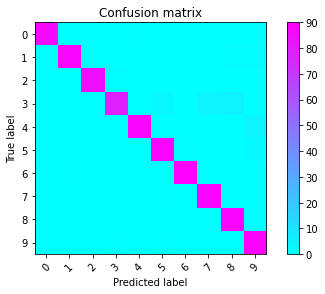

In [7]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.cool):
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names, rotation=45)
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

In [8]:
print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))

# 而在機器學習理論中，我們通常用以下precision, recall, f1-score來探討精確度。以手寫影像3為例。
# precision = TP/(TP+FP) = 79/81 = 0.98判斷為3且實際為3的比例為0.98
# recall = TP/(TP+FN) = 79/91 = 0.87實際為3且判斷為3的比例為0.87
# f1-score 則為以上兩者之「harmonic mean 調和平均數」
# f1-score= 2 x precision x recall/(recision + recall) = 0.92
# metrics物件裏也提供了方便的函式metrics.classification_report(expected, predicted)計算以上統計數據。

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




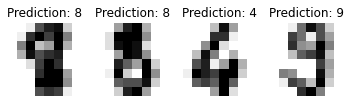

In [17]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()